In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
plt.rcParams["figure.figsize"] = (9, 4)
plt.rcParams["axes.grid"] = True

In [3]:
from model import run_experiments
from market import N_PATHS

results_df, price_paths, return_paths, gamma_paths = run_experiments(n_paths=N_PATHS)
results_df.head()

,scenario,path_id,realized_vol,max_drawdown,crashes_abs,crashes_z,kurtosis
0,short_gamma,0,0.121611,-0.151712,0,10,3.607106
1,short_gamma,1,0.118248,-0.147580,0,18,3.701995
2,short_gamma,2,0.118561,-0.146721,0,11,3.651686
3,short_gamma,3,0.119744,-0.158911,0,7,3.497354
4,short_gamma,4,0.123415,-0.160121,0,5,3.375520


In [4]:
summary = results_df.groupby("scenario").agg(
    mean_vol=("realized_vol","mean"),
    std_vol=("realized_vol","std"),
    mean_mdd=("max_drawdown","mean"),
    mean_crashes_z=("crashes_z","mean"),
    mean_crashes_abs=("crashes_abs","mean"),
    mean_kurt=("kurtosis","mean"),
)
summary


,mean_vol,std_vol,mean_mdd,mean_crashes_z,mean_crashes_abs,mean_kurt
scenario,,,,,,
long_gamma,0.067419,0.002240,-0.111537,6.875,0.0,3.687470
no_hedge,0.062391,0.002318,-0.118637,6.295,0.0,3.703880
short_gamma,0.121069,0.001737,-0.154792,8.705,0.0,3.505557


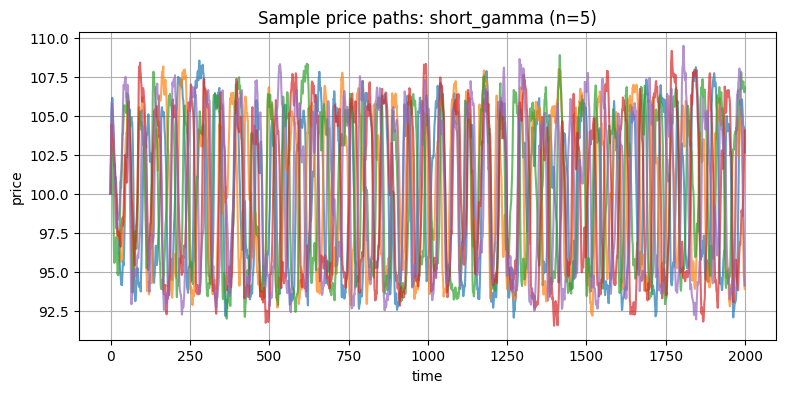

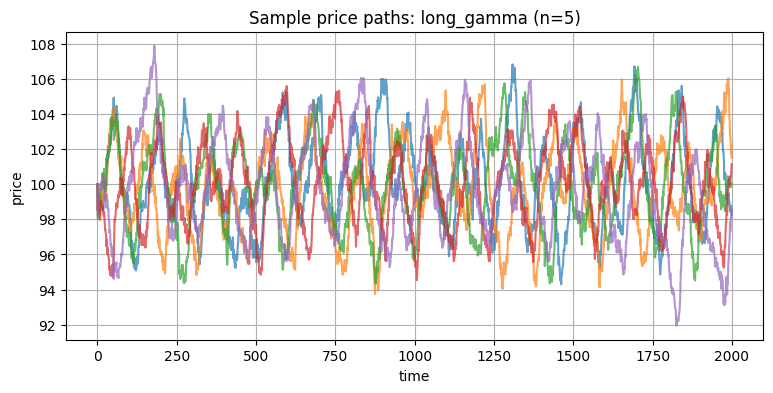

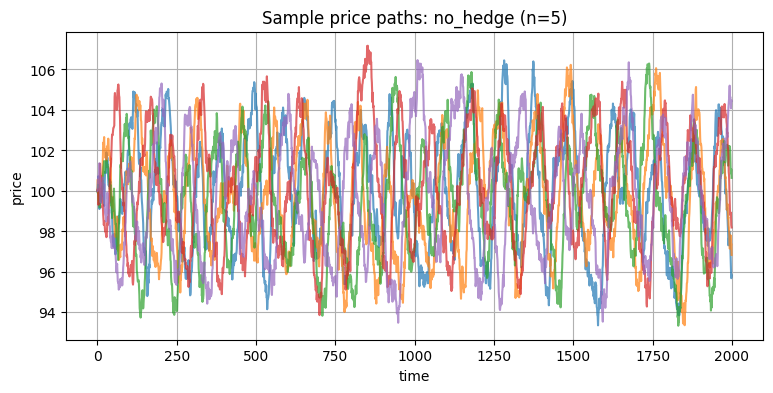

<Figure size 900x400 with 0 Axes>

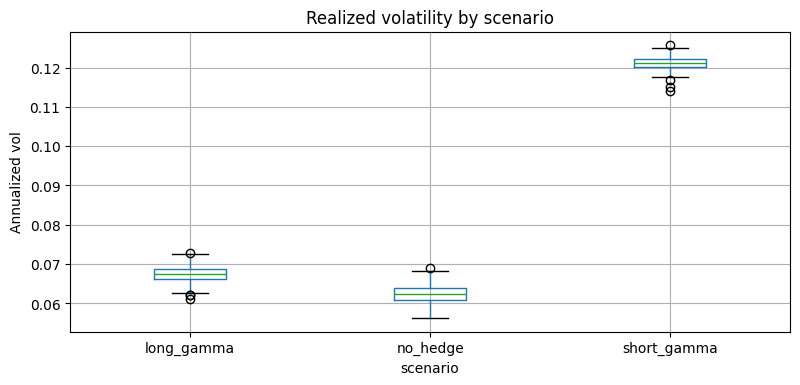

<Figure size 900x400 with 0 Axes>

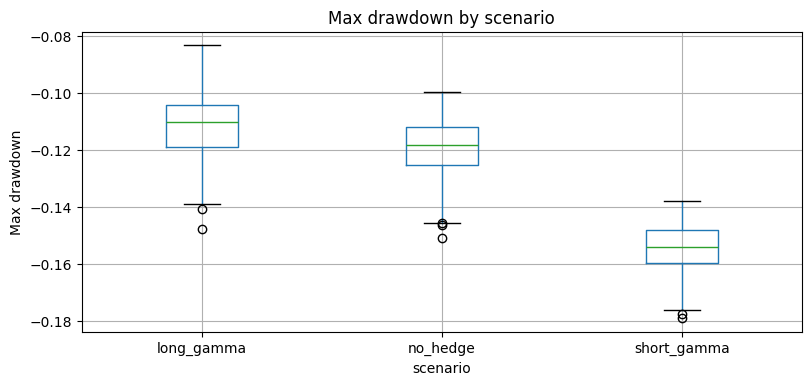

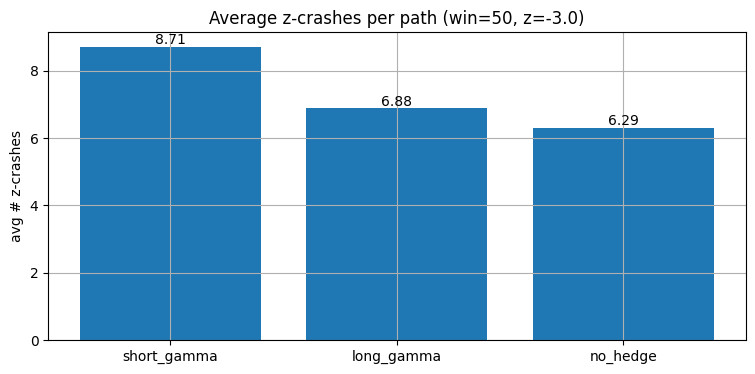

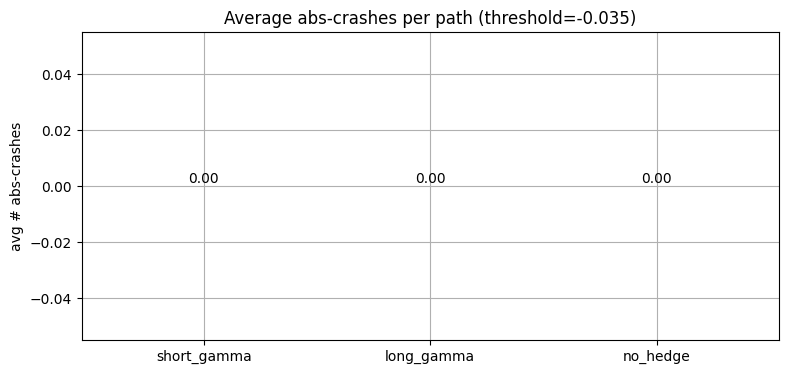

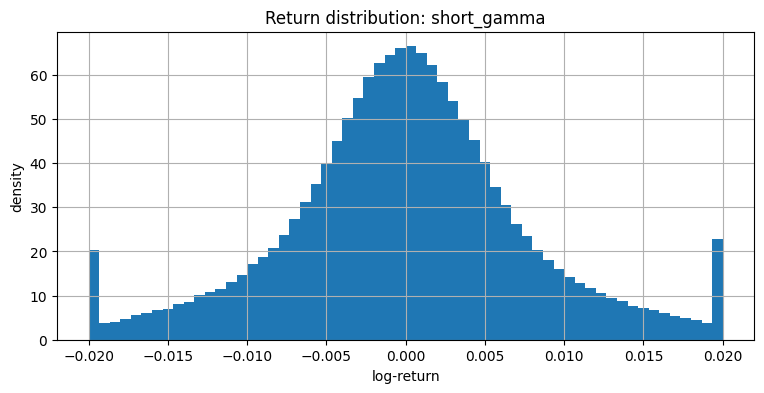

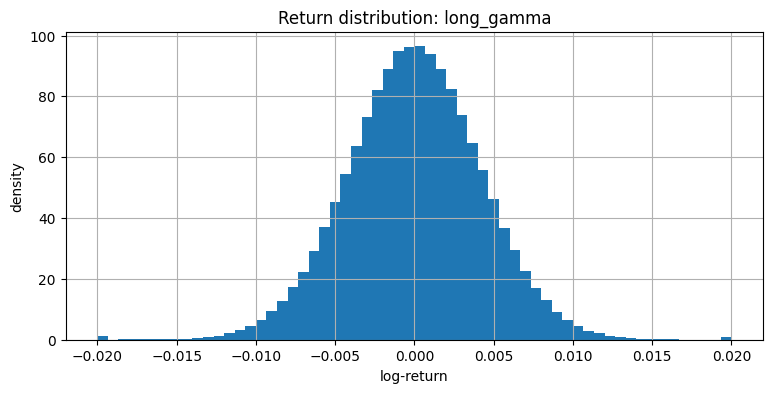

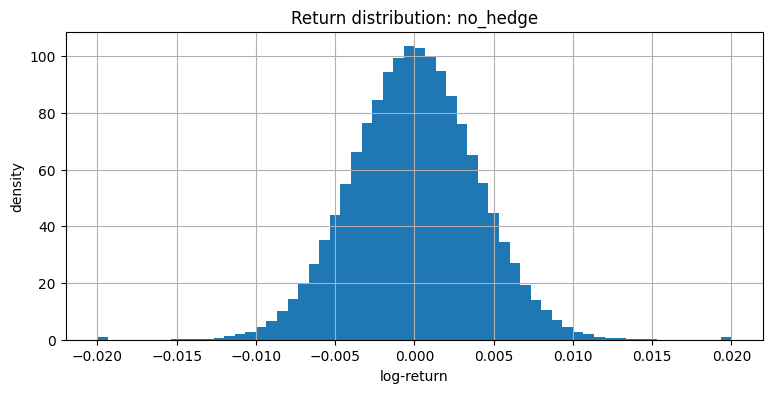

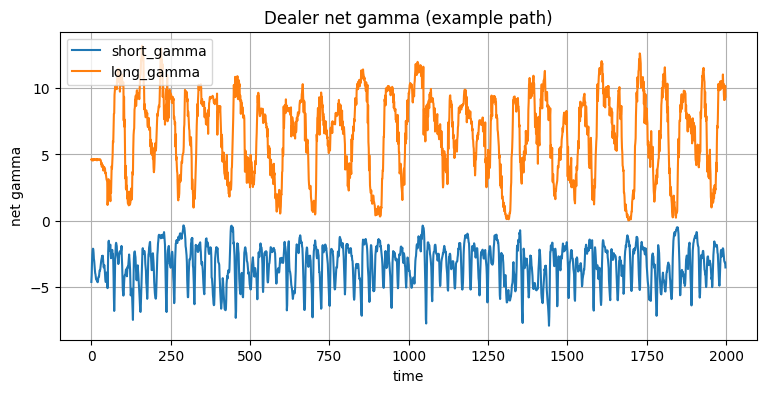

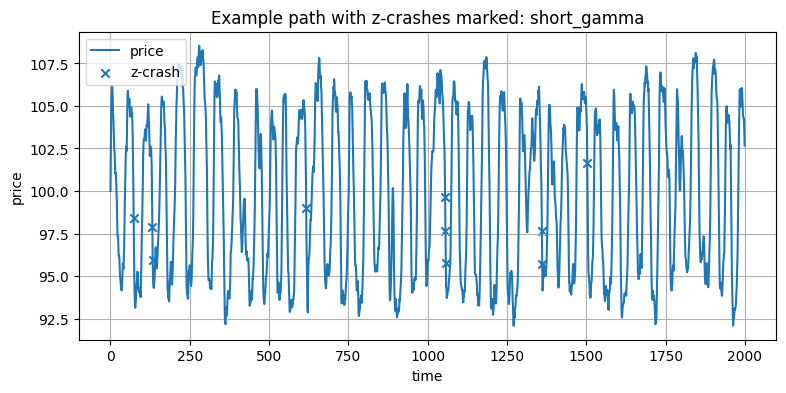

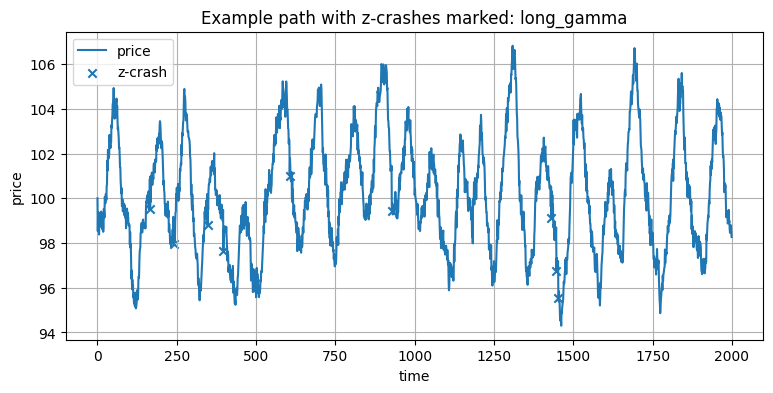

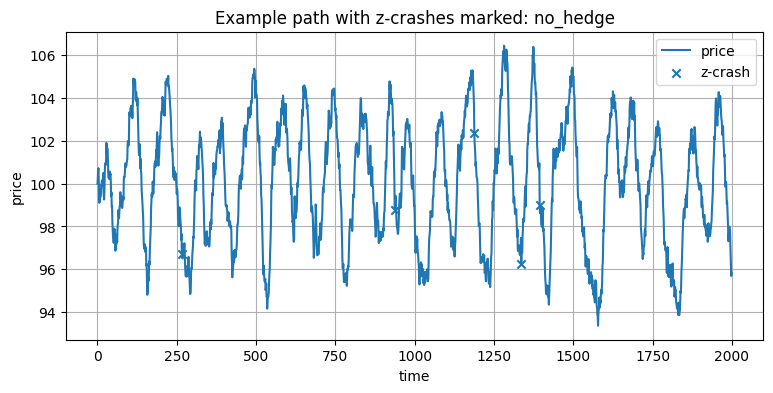

In [5]:
from visualization import (
    plot_sample_price_paths,
    plot_boxplots,
    plot_crash_bars,
    plot_return_histograms,
    plot_dealer_gamma_example,
    plot_zcrash_marks,
)

plot_sample_price_paths(price_paths, n_show=5)
plot_boxplots(results_df)
plot_crash_bars(results_df)
plot_return_histograms(return_paths)
plot_dealer_gamma_example(gamma_paths)
plot_zcrash_marks(price_paths, return_paths)

In [6]:
from analysis import run_hypothesis_tests
tests = run_hypothesis_tests(results_df, return_paths)
tests

/Users/podoliakina_a/Documents/financial math/analysis.py:72: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  out["H1_AD"] = anderson_ksamp([short_all, long_all])


{'H1_KS': KstestResult(statistic=np.float64(0.1075312656328164), pvalue=np.float64(0.0), statistic_location=np.float64(-0.006030070276326072), statistic_sign=np.int8(1)),
 'H1_CvM': CramerVonMisesResult(statistic=1110.5911360589962, pvalue=2.5795776870118914e-07),
 'H1_AD': Anderson_ksampResult(statistic=np.float64(13325.263583872907), critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=np.float64(0.001)),
 'H2_means': (8.705, 6.875, 6.295),
 'H2_MW_short_gt_long': ('Mann–Whitney',
  25822.0,
  2.0858655804189713e-07,
  'ok'),
 'H2_Welch': ('Welch t-test', 5.739950316907014, 2.078140606821002e-08, 'ok'),
 'H2_Kruskal_3': ('Kruskal', 48.84977040457065, 2.4683522447823363e-11, 'ok'),
 'H2_any_crash_binary': ('Fisher exact', 0.0, 1.0, 'ok'),
 'H3_means': (-0.15479214753766768,
  -0.11153665155625658,
  -0.11863693164017661),
 'H3_MW_short_lt_long': ('Mann–Whitney', 51.0, 5.188856360669611e-67, 'ok'),
 'H3_Welch': ('Welch t-test', -45.4661423856086, 3.931322052